# 주가 지수 분석(현대차, 삼성전자, 코스피)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model

## 01.데이터 불러오기, 전처리


In [4]:
h_stock = pd.read_csv('/content/H_stock.csv') # H 회사 주식
s_stock = pd.read_csv('/content/S_stock.csv') # S 회사 주식
k_index = pd.read_csv('/content/K_index.csv') # Kospi 지수

In [6]:
print(h_stock)
print(h_stock.shape)
print()
print(s_stock)
print(s_stock.shape)
print()
print(k_index)
print(k_index.shape)

           date  h_price  h_rate
0    2015-03-25    45500     NaN
1    2015-03-26    45900   0.879
2    2015-03-27    45000  -1.961
3    2015-03-30    45600   1.333
4    2015-03-31    46000   0.877
..          ...      ...     ...
244  2016-03-21    60100   0.839
245  2016-03-22    59200  -1.498
246  2016-03-23    58900  -0.507
247  2016-03-24    59300   0.679
248  2016-03-25    59300   0.000

[249 rows x 3 columns]
(249, 3)

           date  s_price  s_rate
0    2015-03-25  1485000     NaN
1    2015-03-26  1421000  -4.310
2    2015-03-27  1421000   0.000
3    2015-03-30  1428000   0.493
4    2015-03-31  1441000   0.910
..          ...      ...     ...
244  2016-03-21  1267000  -0.471
245  2016-03-22  1269000   0.158
246  2016-03-23  1279000   0.788
247  2016-03-24  1282000   0.235
248  2016-03-25  1288000   0.468

[249 rows x 3 columns]
(249, 3)

           date    kospi  k_rate
0    2015-03-25  2042.81     NaN
1    2015-03-26  2022.56  -0.991
2    2015-03-27  2019.80  -0.136
3    201

In [7]:
# NaN 있는 헤더 정보 제거 
# 데이터프레임 >> 넘파이 배열 

h_rate = np.array(h_stock.h_rate[1:])
s_rate = np.array(s_stock.s_rate[1:])
k_rate = np.array(k_index.k_rate[1:])

In [8]:
print(h_rate)
print(h_rate.shape)
print()
print(s_rate)
print(s_rate.shape)
print()
print(k_rate)
print(k_rate.shape)
print()

[ 0.879 -1.961  1.333  0.877 -0.109  0.762  0.756 -1.929 -0.874 -3.638
 -1.373  1.276 -0.802  1.386 -0.228  5.023  3.37  -2.734 -0.432 -1.194
  0.659  2.293  0.32   2.021 -0.521 -1.782  2.348 -2.92  -0.644 -0.973
  2.183  0.641  0.212 -0.847  0.    -0.214 -1.285  3.905 -0.939  2.213
 -3.093 -2.66  -0.109  1.094 -1.515  0.769 -1.2   -1.766  0.674  0.
 -0.223 -2.237  0.343 -0.798  0.69  -1.826 -0.698 -0.585  3.887  4.762
 -0.325 -1.303 -0.77   0.222 -0.885  2.232  1.201  0.539  0.644  0.213
 -0.957  1.504  1.693 -1.353  1.266  2.083  0.102 -0.306  0.307  1.733
  1.002 -3.472  2.261 -3.216 -1.038  1.154  0.622  0.206  4.733  2.554
 -0.958 -0.193 -0.969 -0.196  0.588 -1.949 -0.994 -0.402  1.815  0.594
 -0.394  2.174 -4.255 -3.636 -0.419  3.474  0.712 -0.606 -2.439  1.042
 -1.753 -0.315 -1.579  1.176 -2.114  2.916  3.358 -2.437  1.249  0.
  0.103 -2.156 -0.315 -0.211  4.852 -2.817  1.035  0.512 -0.102  0.
 -1.531  1.451  0.511 -1.728  0.    -0.207  0.104  3.416  1.301  1.581
  0.778  0.965 

In [ ]:
#참고사항
h_rate.shape

h_rate.shape[0]

In [9]:
# 선형회귀모델 함수에 넣기 위해서 reshape  차원조정 (예): (248,) >> (248,1)

h_rate.reshape(h_rate.shape[0],1)

array([[ 0.879],
       [-1.961],
       [ 1.333],
       [ 0.877],
       [-0.109],
       [ 0.762],
       [ 0.756],
       [-1.929],
       [-0.874],
       [-3.638],
       [-1.373],
       [ 1.276],
       [-0.802],
       [ 1.386],
       [-0.228],
       [ 5.023],
       [ 3.37 ],
       [-2.734],
       [-0.432],
       [-1.194],
       [ 0.659],
       [ 2.293],
       [ 0.32 ],
       [ 2.021],
       [-0.521],
       [-1.782],
       [ 2.348],
       [-2.92 ],
       [-0.644],
       [-0.973],
       [ 2.183],
       [ 0.641],
       [ 0.212],
       [-0.847],
       [ 0.   ],
       [-0.214],
       [-1.285],
       [ 3.905],
       [-0.939],
       [ 2.213],
       [-3.093],
       [-2.66 ],
       [-0.109],
       [ 1.094],
       [-1.515],
       [ 0.769],
       [-1.2  ],
       [-1.766],
       [ 0.674],
       [ 0.   ],
       [-0.223],
       [-2.237],
       [ 0.343],
       [-0.798],
       [ 0.69 ],
       [-1.826],
       [-0.698],
       [-0.585],
       [ 3.887

In [10]:
h_rate=h_rate.reshape(h_rate.shape[0],1)
s_rate=s_rate.reshape(s_rate.shape[0],1)
k_rate=k_rate.reshape(k_rate.shape[0],1)

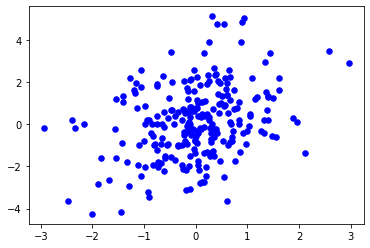

In [11]:
# 산점도 그리기 (k_rate와 h_rate 비교) x: k_rate, y: h_rate

plt.scatter(k_rate, h_rate, c='blue', s=30, marker='o')

## 02.모델링

In [12]:
model=linear_model.LinearRegression()
model.fit(k_rate, h_rate)

LinearRegression()

In [13]:
model.predict(k_rate)

array([[-5.02823664e-01],
       [ 3.99487981e-02],
       [ 4.48139082e-01],
       [ 4.69723017e-01],
       [-2.64765567e-01],
       [ 1.45964004e-01],
       [ 6.37950739e-01],
       [ 1.57390793e-01],
       [ 1.44694361e-01],
       [ 5.05273026e-01],
       [ 1.14222924e-01],
       [ 1.01693923e+00],
       [ 4.65914087e-01],
       [ 5.13525707e-01],
       [ 3.73864956e-01],
       [ 7.23651654e-01],
       [ 2.32934562e-01],
       [ 2.21507774e-01],
       [ 6.97854129e-02],
       [ 9.96220278e-02],
       [ 1.00043387e+00],
       [-2.71113783e-01],
       [ 5.96282675e-02],
       [-1.63828933e-01],
       [-2.28985396e-02],
       [-3.32056655e-01],
       [ 2.77372074e-01],
       [-6.97079072e-01],
       [-2.83175393e-01],
       [-4.00387227e-02],
       [ 4.87498021e-01],
       [ 1.07874709e-01],
       [ 6.52551635e-01],
       [ 3.11652440e-01],
       [-2.87619144e-01],
       [ 3.44028341e-01],
       [ 3.40219412e-01],
       [ 6.85562358e-01],
       [-3.7

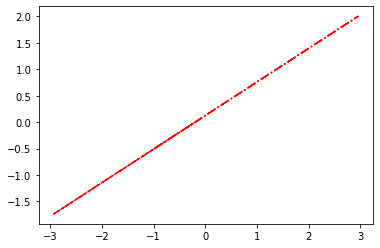

In [14]:
# 실제값(y)와 예측값(y_hat) 비교
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', c='red')

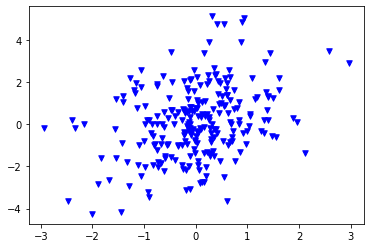

In [15]:
# k_rate, h_rate 관계성 확인
plt.scatter(k_rate, h_rate, c='blue', s=30, marker='v')

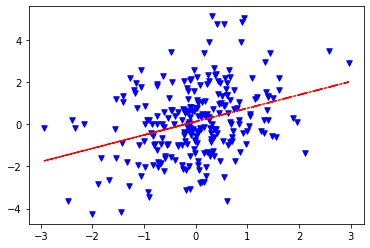

In [16]:
plt.plot(k_rate, model.predict(k_rate), linestyle='-.', c='red')
plt.scatter(k_rate, h_rate, c='blue', s=30, marker='v')

In [17]:
print('기울기:', model.coef_)  
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, h_rate))

# 기울기: [[0.63482159]] 
# 코스피 지표(k_rate)와 h회사 주가변동(h_rate)간 63% 관계가 있음(영향력이 있음)

기울기: [[0.63482159]]
절편: [0.12628453]
결정계수: 0.1064571423759525


기울기: [[1.00132771]]
절편: [-0.03500143]
결정계수: 0.2644483831226938


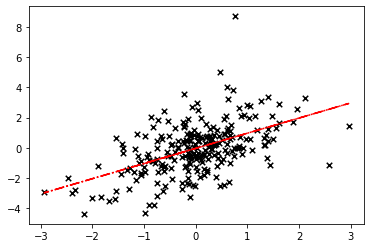

In [18]:
plt.scatter(k_rate, s_rate, c='black', s=30, marker='x')

model = linear_model.LinearRegression()
model.fit(k_rate, s_rate)

plt.plot(k_rate, model.predict(k_rate), linestyle='-.', label='s_stock', c='red')

print('기울기:', model.coef_)  
print('절편:', model.intercept_)
print('결정계수:', model.score(k_rate, s_rate))

# 코스피지수 변동(k_rate)이 s 회사의 주가변동(s_rate)에 100% 가까운 영향력을 끼치고 있다. 
# 베타지수(beta_index) 크면 공격성향이 큰 주가로 판단 

# 당뇨병

In [19]:
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# 당뇨병 환자 데이터 가져오기 

datasets.load_diabetes()

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, b

In [21]:
diabetes = datasets.load_diabetes()
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [22]:
diabetes.data.shape

(442, 10)

In [23]:
diabetes.feature_names[2]

'bmi'

In [24]:
diabetes.data[:, 2]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [25]:
diabetes.data[:, 2].reshape(len(diabetes.data), 1)

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [26]:
diabetes_X = diabetes.data[:, 2].reshape(len(diabetes.data), 1)

In [27]:
diabetes_X.shape, diabetes_X

((442, 1), array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],
 

In [28]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [29]:
# train data, test data 분리 

train_x = diabetes_X[:-20]
test_x = diabetes_X[-20:]

train_y = diabetes.target[:-20]
test_y = diabetes.target[-20:]

In [30]:
lr = linear_model.LinearRegression()
lr.fit(train_x, train_y) # train data로 fit(학습)시킴

LinearRegression()

In [31]:
# 예측 
pred_y = lr.predict(test_x) # test data로 predict(예측)
pred_y

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [32]:
lr.coef_  # 계수(가중치)

r2_score(test_y, pred_y) # 결정계수 

0.47257544798227147

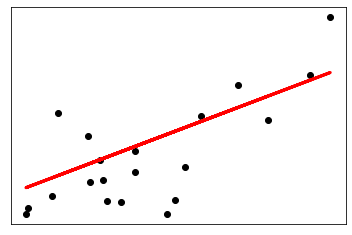

In [33]:
plt.scatter(test_x, test_y, c='black')
plt.plot(test_x, pred_y, c='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()